In [3]:
# First we will have to import the dataclass we're using to hold our data, as well as, the helper functions that we'll need.
from Mouse_Data import Mouse_Data
from helpers import *
from visualization import *

# We will also import some additional functions from commonly used packages for convenience and plotting.
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy as sp
matplotlib.rcParams.update({'font.size':16, 'font.family':'Times New Roman', 
                            'axes.facecolor':'white' , 'figure.facecolor':'white', 'figure.dpi':100})   
from matplotlib.gridspec import GridSpec

# root = 'F:/mStim_data/'
# root = 'C:/Users/miksc/mStim_data/'
root = 'D:/mStim_data/'
path_ext = '/microstim/Session Data/'
savePath = 'C:/Users/miksc/OneDrive/Documenten/PhD/PosterPresentationPapers/posters/SfN2024/figures/'

# root = 'D:/nPixelData/'
# root = 'F:/mStim_data/Ephys/'
# ctrl_IDs = ['SNA-137704', 'SNA-137705', 'SNA-137821'] #NP2.0 recordings

# ctrl_IDs = ['SNA-123601', 'SNA-123602', 'SNA-123599', 'SNA-126687', 'SNA-126688', 'SNA-127100', 'SNA-132298', 'SNA-132303', 'SNA-132305'] 
# ctrl_data = [Mouse_Data(root + ID + path_ext) for ID in ctrl_IDs]

# rapa_IDs = ['SNA-123995', 'SNA-123996', 'SNA-127101', 'SNA-127102', 'SNA-131642']
# rapa_data = [Mouse_Data(root + ID + path_ext) for ID in rapa_IDs]
# aniso_IDs = ['SNA-132306', 'SNA-132341', 'SNA-132342']
# aniso_data = [Mouse_Data(root + ID + path_ext) for ID in aniso_IDs]
# /'SNA-136082', 'SNA-136083'] #'SNA-136082', 'SNA-136083' Actually aniso_pre but who cares
# vps_IDs = ['SNA-130487', 'SNA-132340']  # 'SNA-130484', 'SNA-130485' Were removed because they show immediate learning?
# vps_data = [Mouse_Data(root + ID + path_ext) for ID in vps_IDs]

# x = Mouse_Data('F:/nPixelData/MLA-026042/')
x=Mouse_Data('D:/nPixelData/mStim_data/VPS34/SNA-141497/')

x.plot_raster_rt()

ValueError: Unknown mat file type, version 104, 97

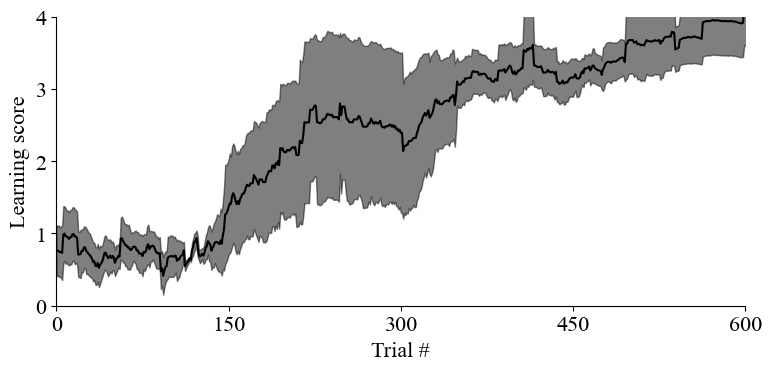

In [4]:
def get_dprime_subplot(ax, mouse_data, color='black', label=''):
    dpall = []
    for mouse in mouse_data:
        dplist = calc_d_prime(mouse, binsize=60)
        dpall.append(dplist)
    
    # Extend lists and compute the mean
    dpall = extend_lists(dpall)
    d_mean = np.mean(dpall, axis=0)
    
    # Plot the mean d-prime values on the provided subplot (ax)
    ax.plot(d_mean, color=color, label=label)

    # Calculate standard error of the mean (SEM)
    d_std = np.std(dpall, axis=0)   
    d_sem = d_std / np.sqrt(len(mouse_data))  # Changed from ctrl_data to mouse_data
    y_min = np.subtract(d_mean, d_sem)
    y_max = np.add(d_mean, d_sem)

    # Create x-axis values
    x = np.arange(0, len(d_mean), 1)
    
    # Add shaded SEM region to the plot
    ax.fill_between(x, y_min, y_max, alpha=0.5, color=color)

    # Add labels and title if necessary
    ax.set_xlabel('Trial #')
    ax.set_ylabel('Learning score')# \n (d-prime)')
    ax.set_xlim(0,600)
    ax.set_ylim(0,4)
    ax.set_xticks([0,150,300,450,600])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return ax  # Return the axes object for further modifications if needed

# Example usage to create a figure with subplots
fig, axs = plt.subplots(1,1, figsize=(8, 4))  # Create a figure and a single subplot
# [get_dprime_subplot(ax, ctrl_data, color='black') for ax in axs] # Pass the subplot (ax) and the data
get_dprime_subplot(axs, ctrl_data, color='black', label='Saline') 
# get_dprime_subplot(axs, aniso_data, color='blue', label='Anisomycin') 
# get_dprime_subplot(axs, rapa_data, color='red', label='Rapamycin')
# get_dprime_subplot(axs, vps_data, color='blueviolet', label='VPS34 IN') 
# plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

savePath = 'C:/Users/miksc/OneDrive/Documenten/PhD/PosterPresentationPapers/posters/'

# fig.savefig(fname=savePath + 'dprime_RapVPS.svg', dpi=600)
# fig.savefig(fname=savePath + 'dprime_vpsleg.jpg', dpi=600)
# fig.savefig(fname=savePath + 'dprime_all.svg', dpi=600)
# fig.savefig(fname=savePath + 'dprime_all.jpg', dpi=600)

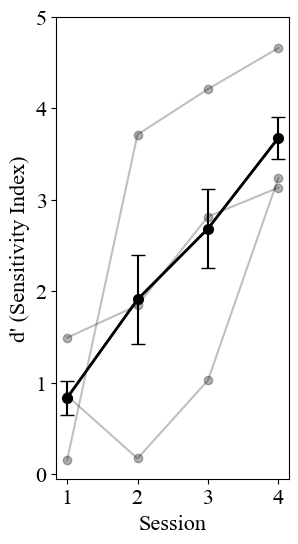

In [ ]:
def plot_d_prime(mouse_data):
    if not isinstance(mouse_data, list):
        mouse_data = [mouse_data]
    mega_d = []
    for mouse in mouse_data:
        d_prime_list = calc_d_prime(mouse)
        mega_d.append(d_prime_list)

    avg_list, std_list = get_avg_std_threshold(mega_d, max_sessions=4)

    # Ploterdeplot
    fig = plt.figure(figsize=(3,6))
    # Individual lines and points
    [plt.plot(d_prime, c='black', alpha=0.25) for d_prime in mega_d] 
    [plt.scatter(x=[0,1,2,3],y=d_prime, c='black', alpha=0.3) for d_prime in mega_d]  
    # Average
    plt.plot(avg_list, c='black', linewidth=2)
    plt.scatter(x=[0,1,2,3], y=avg_list, c='black', linewidths=2)

    # SEM
    sem_list = np.array(std_list)/len(mouse_data)
    if len(mouse_data) > 1:
        plt.errorbar([0,1,2,3], avg_list, yerr=sem_list, c='black',capsize=5)

    # Format
    plt.ylim([-0.05,5])
    plt.ylabel('d\' (Sensitivity Index)')
    plt.xticks([0,1,2,3], [1,2,3,4])
    plt.xlabel('Session')
    plt.show()
    
plot_d_prime(ctrl_data)

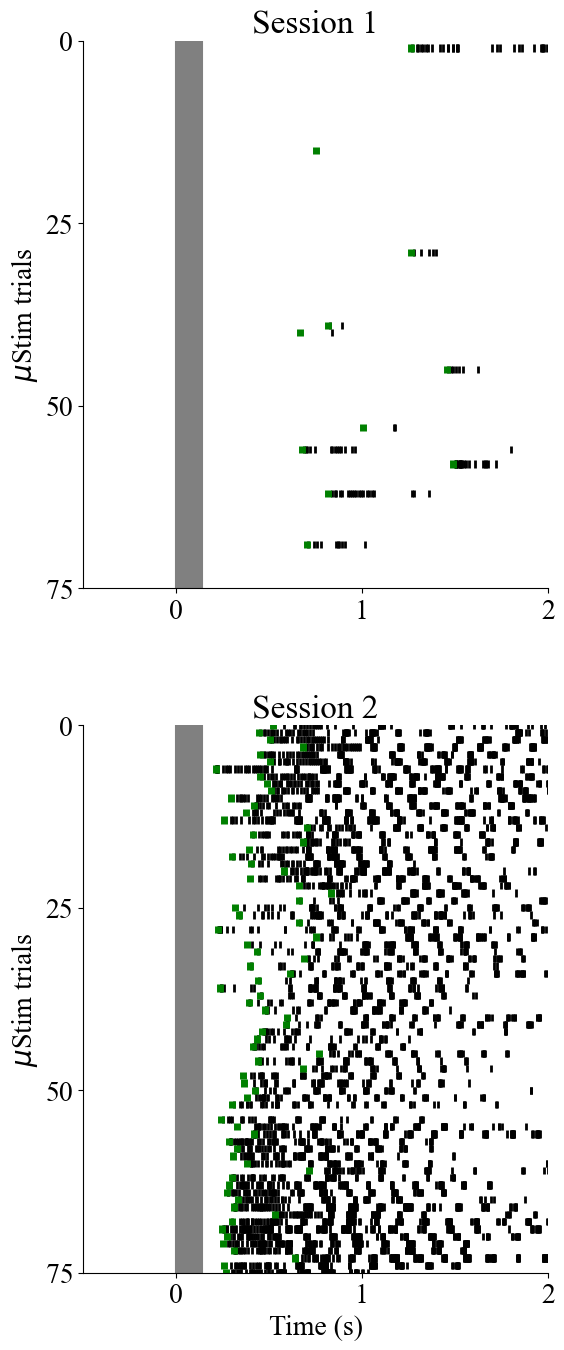

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches

def plot_learninglicks(mouse_data, save=False, peak=False):
    '''docstring'''
    # Limit to 2 sessions for plotting in 1x2 grid
    n_sessions = 2

    # Set figure basics for 1 row, 2 columns
    fig, axs = plt.subplots(2, 1, figsize=(6, 16))  # 1x2 grid for subplots
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    fig.patch.set_facecolor('white')

    # Create legend patches 
    gray_patch = matplotlib.patches.Patch(color='gray', label='Stimulus')

    # Get and plot data for the mouse
    for idx, session in enumerate(mouse_data.sessions):
        if peak and idx == n_sessions:
            break
        if idx == 1 or idx == 2:
            continue
        if idx == 3:
            idx = 1  # Ensure correct subplot for the 4th session

        for trialtype in [1]:  # Only use trialtype 1 for now
            # Determine subplot location (row is always 0 now)
            row = 0
            col = idx
            colr = 'green' if trialtype == 1 else 'red'

            # Only specific trial types are necessary to plot here
            stimTrials = select_trialType(mouse_data.session_data[session], trialType=trialtype)

            # Get the licks, remove premature licks and zero on stim_t
            for i, trialData in enumerate(stimTrials.iterrows()):
                trialData = trialData[1]  # Extract trial data

                licks = trialData['licks']
                stim_t = trialData['stim_t']

                if isinstance(licks, (list, np.ndarray)) and isinstance(stim_t, (int, float)):
                    adjusted_licks = np.array([lick for lick in licks if lick > stim_t + 0.2]) - stim_t
                    adjusted_licks = adjusted_licks[::5]

                    line_colors = [[colr] + ['black']*(len(adjusted_licks)-1)]
                    lw = 2 # if row == 0 else 3
                    line_widths = [[5] + [lw]*(len(adjusted_licks)-1)]

                    if len(adjusted_licks) > 0:
                        # Plot the remaining licks first (excluding the first one)
                        axs[col].eventplot(adjusted_licks[1:], lineoffsets=i, colors='black', linewidths=lw, zorder=1)

                        # Plot the first lick with a higher zorder
                        axs[col].eventplot([adjusted_licks[0]], lineoffsets=i, colors=colr, linewidths=5, zorder=2)
                    # axs[col].eventplot(adjusted_licks, lineoffsets=i, colors=line_colors, linewidths=line_widths)

            # Now invert y-axis for readability and customize plot
            axs[col].invert_yaxis()
            axs[col].set_ylim([75, 0])
            axs[col].set_yticks([0, 25, 50, 75])
            axs[col].set_xlim([-0.5, 2])
            axs[col].set_xticks([0, 1, 2])
            for x in np.arange(0, 0.15, 0.01):
                axs[col].axvline(x, color='gray')

            # Set title and labels
            if col == 0:
                axs[col].set_title('Session 1')
                # axs[col].set_xlabel('Time (s)')
                axs[col].set_ylabel(r'$\mu$Stim trials')
            elif col == 1:
                axs[col].set_title('Session 2')
                axs[col].set_xlabel('Time (s)')
                axs[col].set_ylabel(r'$\mu$Stim trials')


            axs[col].spines['top'].set_visible(False)
            axs[col].spines['right'].set_visible(False)
            
            

    # Adjust and show the plot
    plt.show()

    # Optionally save the plot
    if save:
        pass
        # fig.savefig(f"{mouse_data.id}_learninglicks.png", dpi=300)

    return fig
matplotlib.rcParams.update({'font.size':20, 'font.family':'Times New Roman', 
                            'axes.facecolor':'white' , 'figure.facecolor':'white'})#, 'figure.dpi':100})   

fig = plot_learninglicks(ctrl_data[4])

# fig.savefig(fname=savePath + 'overnight_licks_vertical.svg', dpi=600)
# fig.savefig(fname=savePath + 'overnight_licks_vertical.jpg', dpi=600)

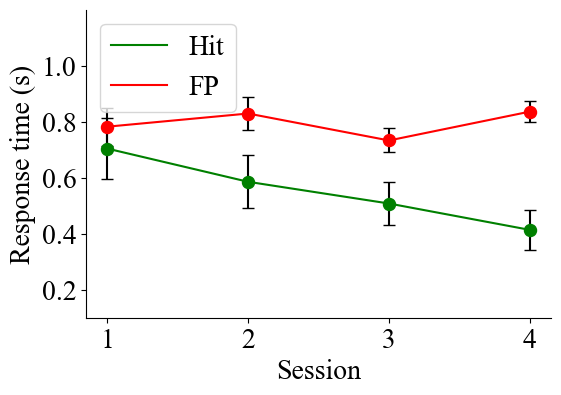

In [7]:
def plot_RT(mouse_data):
    """
    Plot response time (RT) analysis for a list of mouse data sessions.

    This function calculates and visualizes the average response times for 'stim' and 'catch' trials across
    multiple sessions of one or more mice.

    Parameters:
        mouse_data (Mouse_Data or list): A Mouse_Data instance or a list of Mouse_Data instances.

    Returns:
        None
    """
    # Initialize dictionary to store response times
    RT_dict = {'stim': [], 'catch': []}

    # Ensure mouse_data is treated as a list even if it's a single instance
    if not isinstance(mouse_data, list):
        mouse_data = [mouse_data]

    # Iterate over each mouse in the list
    for mouse in mouse_data:
        rt_stim_indi = []
        rt_catch_indi = []

        # Iterate over each session of the mouse
        for session_name in mouse.sessions:
            session = mouse.session_data[session_name]

            # Calculate average response time for 'stim' trials
            stim_trials = select_trialType(session, 'test')
            stim_trials = stim_trials.loc[stim_trials['success'] == True]  # Filter successful trials
            rt_stim = np.average(stim_trials['response_t'])
            rt_stim_indi.append(rt_stim)

            # Calculate average response time for 'catch' trials
            catch_trials = select_trialType(session, 'catch')
            catch_trials = catch_trials.loc[catch_trials['success'] == True]  # Filter successful trials
            rt_catch = np.average(catch_trials['response_t'])
            rt_catch_indi.append(rt_catch)

        # Append response times for the current mouse to RT_dict
        RT_dict['stim'].append(rt_stim_indi)
        RT_dict['catch'].append(rt_catch_indi)

    # Calculate average and standard deviation across mice for each session
    stim_avg = np.average(RT_dict['stim'], axis=0)
    catch_avg = np.average(RT_dict['catch'], axis=0)
    stim_std = np.std(RT_dict['stim'], axis=0)
    catch_std = np.std(RT_dict['catch'], axis=0)
    stim_sem = stim_std/np.sqrt(len(stim_std))
    catch_sem = catch_std/np.sqrt(len(catch_std))

    # Prepare x-axis values (sessions)
    x = np.arange(len(stim_avg))
    
    # Create a new figure and axis for plotting
    fig, ax = plt.subplots(figsize=(6, 4))

    # If multiple mice are plotted, show error bars representing standard deviation
    #SEM
    ax.errorbar(x, stim_avg, yerr=stim_sem, c='black', capsize=4, linestyle='none', zorder=1)
    ax.errorbar(x, catch_avg, yerr=catch_sem, c='black', capsize=4, linestyle='none', zorder=1)
    #STD
    # ax.errorbar(x, stim_avg, yerr=stim_std, c='green', capsize=5, linestyle='none)
    # ax.errorbar(x, catch_avg, yerr=catch_std, c='red', capsize=5, linestyle='none)

    # Plot average response times and add scatter points
    ax.plot(stim_avg, label='Hit', c='green')
    ax.scatter(x, stim_avg, c='green', zorder=2, s=75)  # Scatter plot for 'stim' trials
    ax.plot(catch_avg, label='FP', c='red')
    ax.scatter(x, catch_avg, c='red', zorder=2, s=75)  # Scatter plot for 'catch' trials


    # Set plot limits, ticks, labels, and display the legend
    # ax.set_ylim([0.3, 0.9])
    # ax.set_yticks([0.4,0.5,0.6,0.7,0.8,0.9])
    ax.set_yticks(np.arange(0,1.2, 0.2))
    ax.set_ylim([0.1,1.2])
    ax.set_xticks(x)
    ax.set_xticklabels([1,2,3,4])
    # ax.set_ylabel('Response time (s)')
    # ax.set_xlabel('Session')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Display the plot
    plt.xlabel('Session')
    plt.ylabel('Response time (s)')
    plt.legend(loc='upper left')
    plt.show()

    return fig

fig = plot_RT(ctrl_data)
fig.savefig(fname=savePath + 'RT.svg', dpi=600)
fig.savefig(fname=savePath + 'RT.jpg', dpi=600)

[0.6882363308449514, 0.9509815945238841, 1.800889030874773, 2.124584114739318]
[0.5485538977270809, 1.1258293995598734, 0.9836329167451288, 1.0483878360732586]


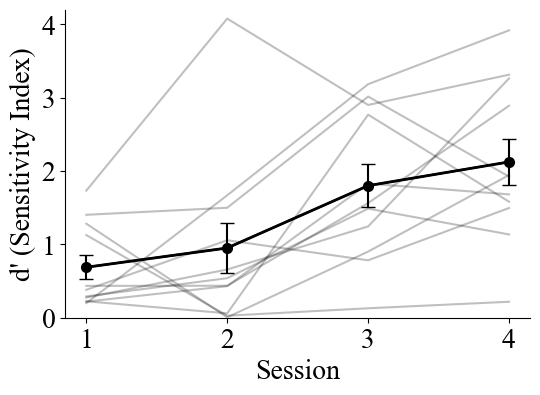

In [9]:
def plot_d_prime(mouse_data):
    if not isinstance(mouse_data, list):
        mouse_data = [mouse_data]
    mega_d = []
    for mouse in mouse_data:
        d_prime_list = calc_d_prime(mouse)
        mega_d.append(d_prime_list)

    avg_list, std_list = get_avg_std_threshold(mega_d, max_sessions=4)
    print(avg_list)
    print(std_list)
    # Ploterdeplot
    fig, ax = plt.subplots(figsize=(6,4))
    # Individual lines and points
    [plt.plot(d_prime, c='black', alpha=0.25) for d_prime in mega_d] 
    # [plt.scatter(x=[0,1,2,3],y=d_prime, c='black', alpha=0.3) for d_prime in mega_d]  
    # Average
    plt.plot(avg_list, c='black', linewidth=2)
    plt.scatter(x=[0,1,2,3], y=avg_list, c='black', linewidths=2)

    # SEM
    sem_list = np.array(std_list)/np.sqrt(len(mouse_data))
    if len(mouse_data) > 1:
        plt.errorbar([0,1,2,3], avg_list, yerr=sem_list, c='black',capsize=5)

    # Format
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylim([0,4.2])
    plt.ylabel('d\' (Sensitivity Index)')
    plt.yticks([0,1,2,3,4])
    plt.xticks([0,1,2,3], [1,2,3,4])
    plt.xlabel('Session')
    plt.show()
    return fig

fig = plot_d_prime(ctrl_data)
fig.savefig(fname=savePath + 'dpsesh.svg', dpi=600)
fig.savefig(fname=savePath + 'dpsesh.jpg', dpi=600)

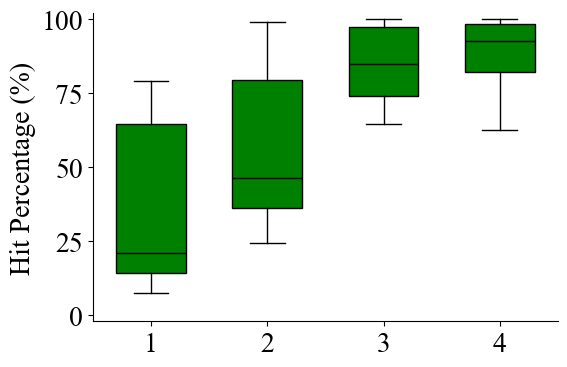

In [12]:
# import seaborn as sns
 
# Row 1: Hit Percentage
def plot_performanceboxplot(mouse_data, average=True):
    fig, ax = plt.subplots(figsize=(6,4))
    bigdict = {'hit_rate': []}
    n_sessions = np.max([len(mouse.sessions) for mouse in mouse_data])
    xticks = np.arange(0, n_sessions, 1)
    massivedict = {n: bigdict.copy() for n in xticks}
    
    data = []
    for n_session in xticks:
        bigdict = {'hit_rate': []}
        for mouse in mouse_data:
            if n_session >= len(mouse.sessions):
                continue
            session = mouse.sessions[n_session]
            testData = select_trialType(mouse.session_data[session], 'test')

            mHit, mMiss = get_hitnmiss(testData)
            mTotal = mHit + mMiss

            if mTotal > 0:
                hit_rate = mHit / mTotal * 100
                bigdict['hit_rate'].append(hit_rate)

        massivedict[n_session] = bigdict
    data = [massivedict[n]['hit_rate'] for n in xticks]
    
    box = plt.boxplot(data, widths=0.6, patch_artist=True, showfliers=False)
    # sns.boxplot(data)
    for patch in box['boxes']:
        patch.set_facecolor('green')
    
    # Change median line color
    for median in box['medians']:
        median.set(color='black', linewidth=1)

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # plt.xticks(np.arange(n_sessions))
    # plt.set_xticklabels([f'Session {i+1}' for i in xticks], rotation=45)
    plt.ylabel('Hit Percentage (%)')
    plt.ylim([-2, 102])
    # plt.set_title('Hit Percentage Over Sessions')
    plt.show()
    return fig

fig = plot_performanceboxplot(ctrl_data)
# fig.savefig(fname=savePath + 'hitperc.svg', dpi=600)
# fig.savefig(fname=savePath + 'hitperc.jpg', dpi=600)

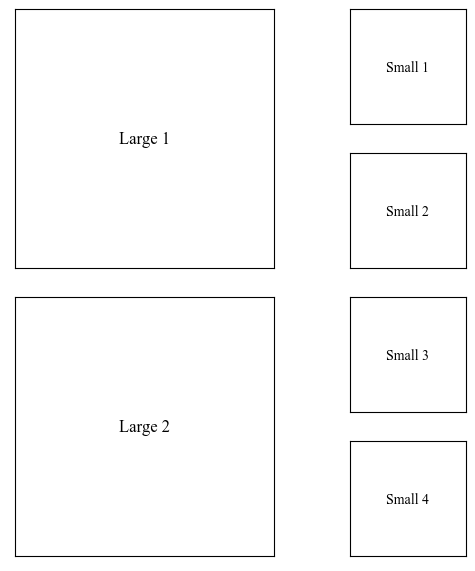

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure
fig = plt.figure(figsize=(6, 6))  # Square figure

# Create a GridSpec with 4 rows and 2 columns
gs = gridspec.GridSpec(4, 2, width_ratios=[2, 1], height_ratios=[1, 1, 1, 1])

# Add the large squares (left column, spanning 2 rows each)
ax1 = fig.add_subplot(gs[0:2, 0])  # Top-left large square
ax2 = fig.add_subplot(gs[2:4, 0])  # Bottom-left large square

# Add the smaller squares (right column, each in a single row)
ax3 = fig.add_subplot(gs[0, 1])  # Top-right small square
ax4 = fig.add_subplot(gs[1, 1])  # Second-right small square
ax5 = fig.add_subplot(gs[2, 1])  # Third-right small square
ax6 = fig.add_subplot(gs[3, 1])  # Bottom-right small square

# Customize the large squares
for ax, label in zip([ax1, ax2], ['Large 1', 'Large 2']):
    ax.text(0.5, 0.5, label, va='center', ha='center', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

# Customize the small squares
for ax, label in zip([ax3, ax4, ax5, ax6], ['Small 1', 'Small 2', 'Small 3', 'Small 4']):
    ax.text(0.5, 0.5, label, va='center', ha='center', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

# Display the plot
plt.tight_layout()
plt.show()


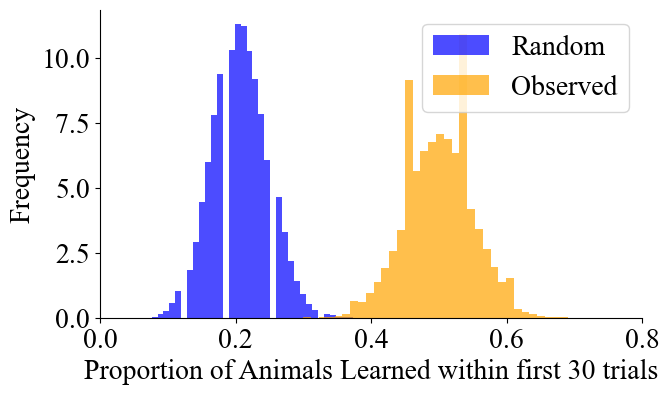

In [18]:
def Monte_Carlo(sample, threshold, num_simulations=100000):
    '''docstring
    INPUT
        sample should be an array 
        threshold should be an interger that corresponds to the number of trials that determines as early learning or begin of session learning
    '''
    # Perform the Monte Carlo simulation
    simulation_results = []
    for _ in range(num_simulations):
        # Resample with replacement
        simulated_sample = np.random.choice(sample, size=100, replace=True)
        # Calculate the proportion of animals that learned within the threshold
        proportion_learned = np.mean(simulated_sample <= threshold)
        simulation_results.append(proportion_learned)

    # Convert results to a Pandas Series for easier analysis
    simulation_results = pd.Series(simulation_results)

    # Calculate the probability of learning within the time threshold
    probability = simulation_results.mean()
    return simulation_results, probability

start_threshold = 30
my_results, my_prob = Monte_Carlo([150, 30, 10, 45, 150, 40, 10, 10, 70, 30], start_threshold)
sim_results, sim_prob = Monte_Carlo(np.arange(150), start_threshold)

# Optional: Plot the distribution of the simulation results
fig, ax = plt.subplots(figsize=(7,4))
plt.hist(sim_results, bins=40, density=True, alpha=0.7, color='blue', label='Random')
plt.hist(my_results, bins=40, density=True, alpha=0.7, color='orange', label='Observed')
# plt.hist(data_results, bins=50, density=True, alpha=0.7, color='red', label='Comp score')
plt.legend(loc='upper right')
plt.xlim(0,0.8)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.title('Monte Carlo Simulation Results')
plt.xlabel('Proportion of Animals Learned within first 30 trials')
plt.ylabel('Frequency')
plt.show()
fig.savefig(fname=savePath + 'MonteCarlo.svg', dpi=600)
fig.savefig(fname=savePath + 'MonteCarlo.jpg', dpi=600)


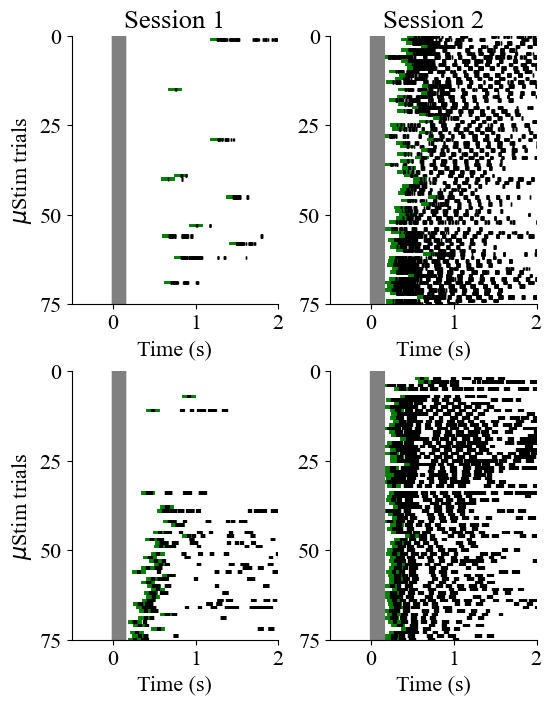

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np

def plot_learninglicks(mouses, save=False, peak=False):
    '''docstring'''
    # Limit to 2 sessions for plotting in 2x2 grid
    n_sessions = 2
    
    # Set figure basics 
    fig, axs = plt.subplots(2, 2, figsize=(6, 8)) # 2x2 grid for subplots
    plt.subplots_adjust(wspace=0.25, hspace=0.25) 
    fig.patch.set_facecolor('white')
    # fig.suptitle(str(mouse_data.id), y=1.0)

    # Create legend patches 
    gray_patch = matplotlib.patches.Patch(color='gray', label='Stimulus')
    row_n =0
    for mouse_data in mouses:
        # Get and plot data for every session
        for idx, session in enumerate(mouse_data.sessions):
            if peak and idx == n_sessions:
                break
            if idx == 1 or idx == 2:
                continue
            if idx == 3:
                idx = 1

            for trialtype in [1]:#[1, 2]:
                # Determine subplot location
                row = row_n if trialtype == 1 else 1
                col = idx
                colr = 'green' if trialtype == 1 else 'red'

                # Only specific trial types are necessary to plot here
                stimTrials = select_trialType(mouse_data.session_data[session], trialType=trialtype)

                # Get the licks, remove premature licks and zero on stim_t
                for i, trialData in enumerate(stimTrials.iterrows()):
                    trialData = trialData[1] # Because the first value is the trialNumber, so slice
                    
                    # Ensure trialData['licks'] and trialData['stim_t'] are valid arrays
                    licks = trialData['licks']
                    stim_t = trialData['stim_t']
                    
                    if isinstance(licks, (list, np.ndarray)) and isinstance(stim_t, (int, float)):
                        # adjusted_licks = np.array(licks) - stim_t
                        adjusted_licks = np.array([lick for lick in licks if lick > stim_t + 0.2]) - stim_t
                    
                        line_colors = [[colr] + ['black']*(len(adjusted_licks)-1)]
                        if row_n == 0:
                            lw = 1
                        else:
                            lw = 3
                        line_widths = [[10] + [lw]*(len(adjusted_licks)-1)]

                        axs[row, col].eventplot(adjusted_licks, lineoffsets=i, colors=line_colors, linewidths=line_widths)#, linelengths=2)

                # Now invert y-axis for readability and customise plot
                axs[row, col].invert_yaxis()
                axs[row, col].set_ylim([75, 0])
                axs[row, col].set_yticks([0, 25, 50, 75])
                axs[row, col].set_xlim([-0.5, 2])
                axs[row, col].set_xticks([0, 1, 2])
                for x in np.arange(0, 0.15, 0.001):
                    axs[row, col].axvline(x, color='gray')

                # Set title and labels
                if row == 0:
                    axs[row, 0].set_title('Session 1')
                    axs[row, 1].set_title('Session 2')
                    axs[row, 0].set_ylabel(r'$\mu$Stim trials')
                    axs[row, 0].spines['top'].set_visible(False)
                    axs[row, 0].spines['right'].set_visible(False)
                    # axs[row, 0].spines['bottom'].set_visible(False)
                    axs[row, 1].spines['top'].set_visible(False)
                    axs[row, 1].spines['right'].set_visible(False)
                    # axs[row, 1].spines['bottom'].set_visible(False)
                    axs[row, col].set_xticks([0,1,2])
                    axs[row, col].set_xlabel('Time (s)')

                else:
                    axs[row, 0].set_ylabel(r'$\mu$Stim trials')
                    axs[row, 0].spines['top'].set_visible(False)
                    axs[row, 0].spines['right'].set_visible(False)
                    # axs[row, 0].spines['bottom'].set_visible(False)
                    axs[row, 1].spines['top'].set_visible(False)
                    axs[row, 1].spines['right'].set_visible(False)
                    # axs[row, 1].spines['bottom'].set_visible(False)
                    axs[row, col].set_xlabel('Time (s)')
        row_n += 1

    # After all trials have been plotted adjust all plots
    plt.show()
    return fig

# fig = plot_lickPerformance(ctrl_data[4])
# fig3 = plot_lickPerformance(ctrl_data[7])
x = plot_learninglicks([ctrl_data[4], ctrl_data[7]])
# fig.savefig(fname=savePath + 'licks_all.svg', dpi=600)


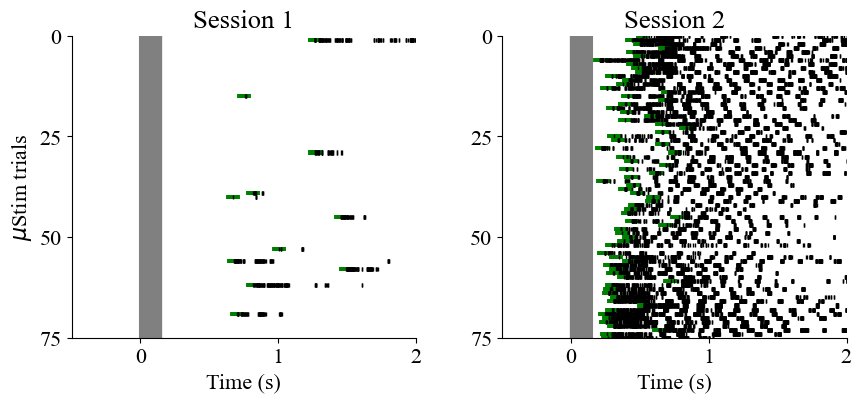